In [1]:
import yt
import numpy as np

In [2]:
ds = yt.load("problem_2/plt00000")

yt : [INFO     ] 2020-03-17 12:34:10,683 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-03-17 12:34:10,684 Parameters: domain_dimensions         = [21 21 80]
yt : [INFO     ] 2020-03-17 12:34:10,686 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-03-17 12:34:10,687 Parameters: domain_right_edge         = [21. 21. 80.]


Starting from the phase equation in eq. 2.27 of the _Rotating Bosons_ notes:

$$\theta = \mathrm{tan}^{-1}\left(\dfrac{\phi_1^I + \phi_2^R}{\phi_1^R - \phi_2^I}\right)$$

This notebook shows a test computing the field phase $\theta$ with three different numerical implementations.

The field initialization is so around each square loop centered in the x,y domain, $\theta=0$ in the lower left corner and increments by a full $2 \pi$ in the first half of the loop to the upper right corner. Then in the second half of the loop, $\theta$ decrements by a full $2 \pi$ back to $0$ at the starting point.

For this test, to set the 4 field components so that the complex field $\phi$ has a particular phase $\theta$:

$$\phi_1^I = \phi_2^I = 0$$

$$\phi_1^R = \begin{cases}
-1 & \frac{\pi}{2} \lt \theta \lt \frac{3 \pi}{2} \\
+1 & \mathrm{otherwise} \\
\end{cases}$$

$$\phi_2^R = \begin{cases}
-|\mathrm{tan}(\theta)| & \pi \lt \theta \lt 2 \pi \\
+|\mathrm{tan}(\theta)| & \mathrm{otherwise} \\
\end{cases}$$

Three different ways of numerically implementing $\theta$ from the field components:

Way 1:

- `theta = atan(Im/Re)`
- in both C++ and numpy, the `atan` function returns angles in the range $[-\pi/2, \pi/2]$
- loses information about which quadrant the angle is in
- adding up phase differences for circulation may not be accurate across quadrants?

Way 2:

- `theta = atan2(Im, Re)`
- in both C++ and numpy, the `atan2` function returns angles in the range $[-\pi, \pi]$
- keeps the quadrant information
- angle is discontinuous at the Re < 0 axis, jumps between $\pi$ and $-\pi$

Way 3:

- `theta = atan2(Im, Re)` and `if theta < 0, theta = theta + 2*pi`
- angles will be in the range $[0, 2 \pi]$
- also keeps quadrant information
- measured CCW from Re > 0 axis, so angles always positive and continuous

In [3]:
def _Theta_Way1(field, data):
    theta = np.arctan((data[('boxlib', 'phi_1_Im')] + data[('boxlib', 'phi_2_Re')]) / (data[('boxlib', 'phi_1_Re')] - data[('boxlib', 'phi_2_Im')]))
    return theta
ds.add_field("Theta_Way1", function=_Theta_Way1, take_log=False, units="", display_name=r"Theta w/ atan in [-pi/2, pi/2]")

def _Theta_Way2(field, data):
    theta = np.arctan2((data[('boxlib', 'phi_1_Im')] + data[('boxlib', 'phi_2_Re')]), (data[('boxlib', 'phi_1_Re')] - data[('boxlib', 'phi_2_Im')]))
    return theta
ds.add_field("Theta_Way2", function=_Theta_Way2, take_log=False, units="", display_name=r"Theta w/ atan2 in [-pi, pi]")

def _Theta_Way3(field, data):
    theta = np.arctan2((data[('boxlib', 'phi_1_Im')] + data[('boxlib', 'phi_2_Re')]), (data[('boxlib', 'phi_1_Re')] - data[('boxlib', 'phi_2_Im')]))
    theta = np.where(theta < 0.0, theta + 2.0 * np.pi, theta)
    return theta
ds.add_field("Theta_Way3", function=_Theta_Way3, take_log=False, units="", display_name=r"Theta w/ atan2 in [0, 2*pi)")

/home/eugene/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  after removing the cwd from sys.path.
/home/eugene/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  if __name__ == '__main__':
/home/eugene/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  from ipykernel import kernelapp as app


/home/eugene/.local/lib/python3.7/site-packages/yt-3.6.dev0-py3.7-linux-x86_64.egg/yt/units/yt_array.py:1395: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)
yt : [INFO     ] 2020-03-17 12:34:10,988 xlim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:10,989 ylim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:10,991 xlim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:10,992 ylim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:11,002 Making a fixed resolution buffer of (('gas', 'Theta_Way1')) 800 by 800



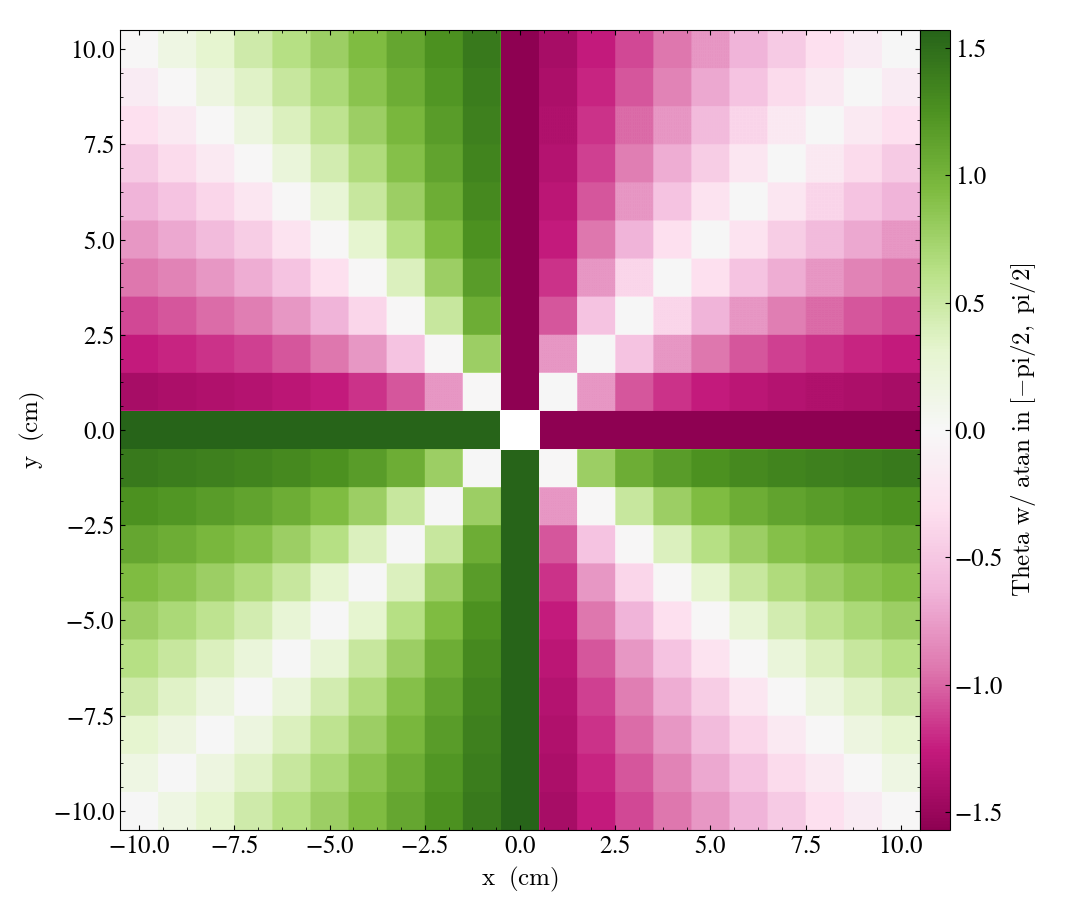

In [4]:
slc1 = yt.SlicePlot(ds, 'z', 'Theta_Way1')
slc1.set_cmap('Theta_Way1', 'PiYG')
slc1.show()

yt : [INFO     ] 2020-03-17 12:34:11,994 xlim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:11,995 ylim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:11,996 xlim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:11,996 ylim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:11,998 Making a fixed resolution buffer of (('gas', 'Theta_Way2')) 800 by 800



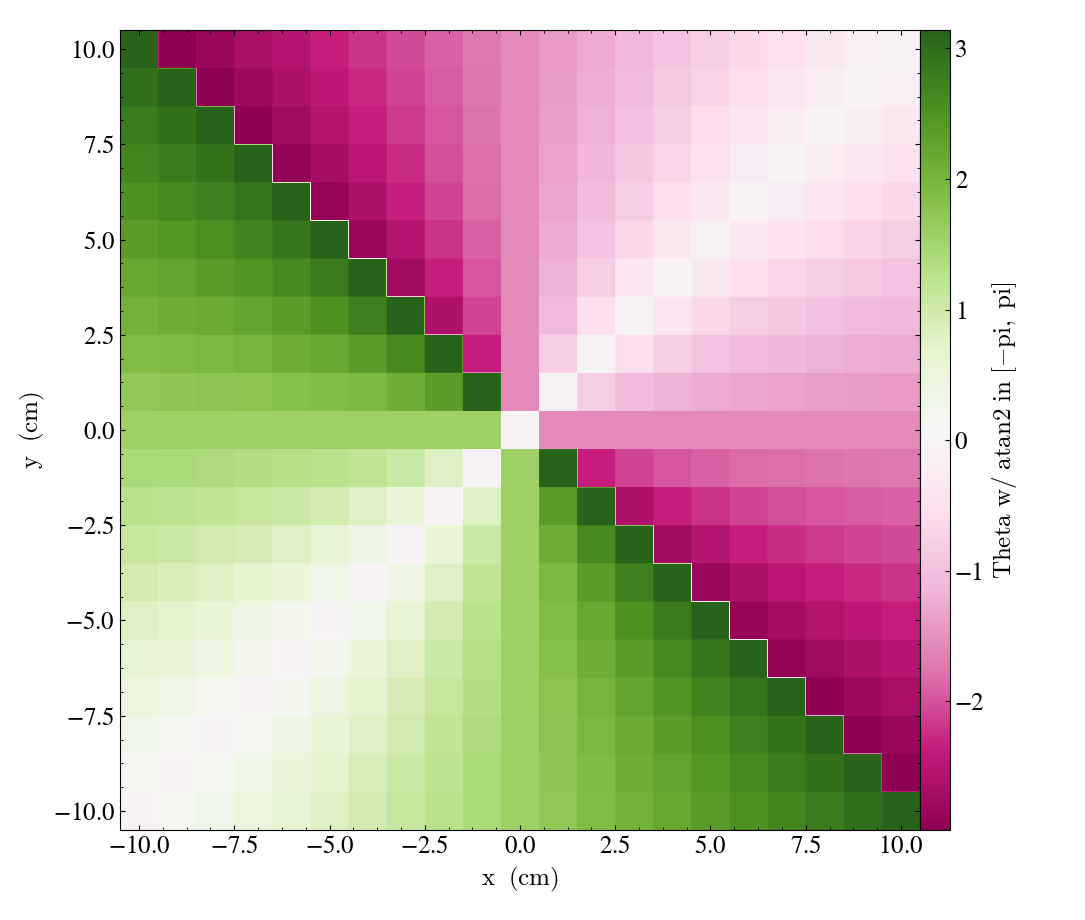

In [5]:
slc2 = yt.SlicePlot(ds, 'z', 'Theta_Way2')
slc2.set_cmap('Theta_Way2', 'PiYG')
slc2.show()

yt : [INFO     ] 2020-03-17 12:34:12,634 xlim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:12,635 ylim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:12,636 xlim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:12,637 ylim = 0.000000 21.000000
yt : [INFO     ] 2020-03-17 12:34:12,639 Making a fixed resolution buffer of (('gas', 'Theta_Way3')) 800 by 800



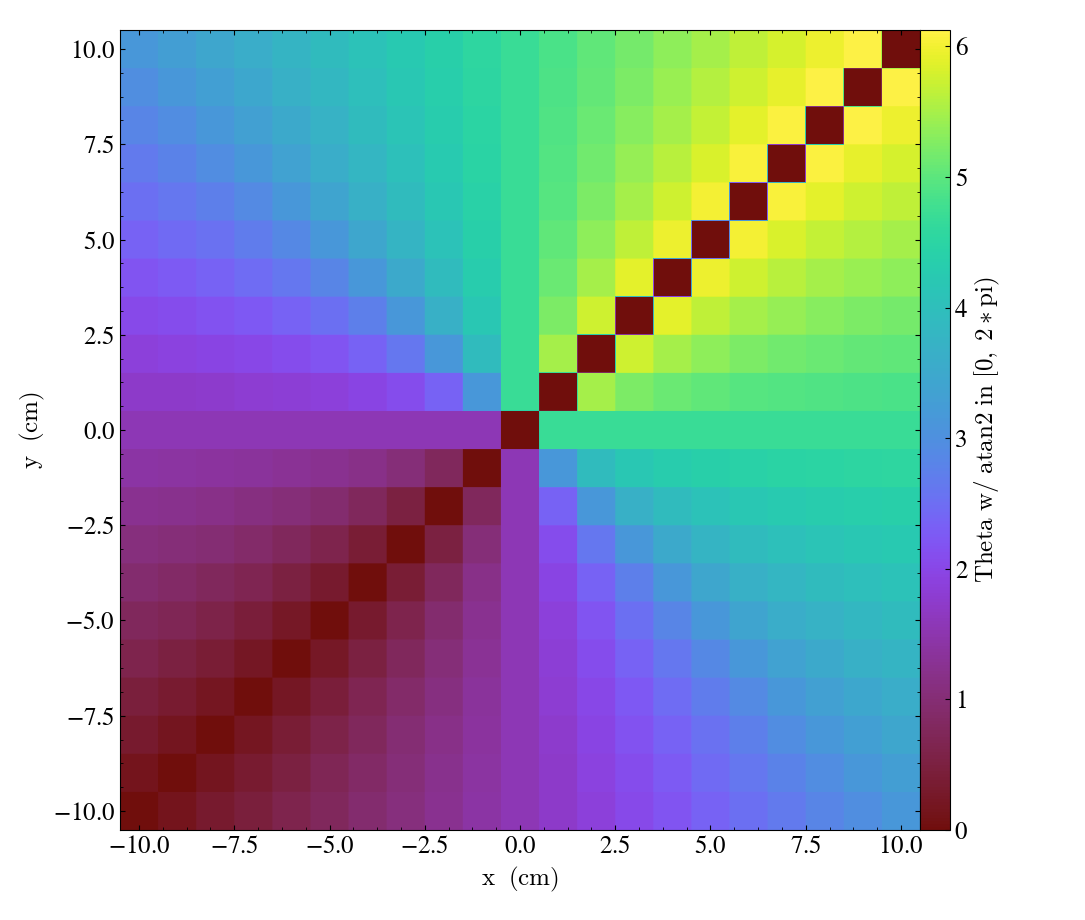

In [6]:
slc3 = yt.SlicePlot(ds, 'z', 'Theta_Way3')
slc3.show()